In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
excel_path = os.path.join('.\\iswp_2_excel.xlsx')

df = pd.read_excel(excel_path, sheet_name=0)

# filter out data for different features
df = df[df['feats'] == "[]"]

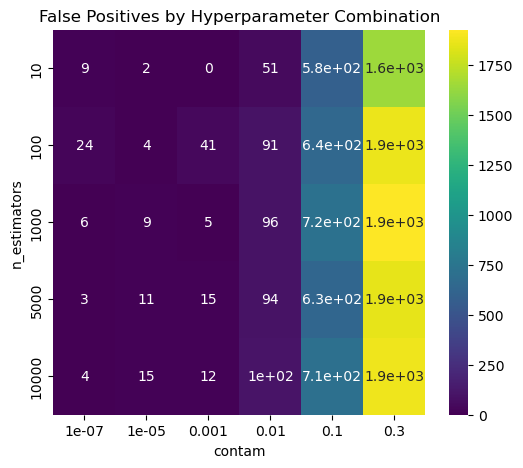

In [4]:
# Pivot for heatmap
pivot = df.pivot(index='IF/n_estimators', columns='IF/contam', values='fp')

plt.figure(figsize=(6, 5))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.xlabel('contam')
plt.ylabel('n_estimators')
plt.title('False Positives by Hyperparameter Combination')
plt.show()

In [5]:
import pingouin as pg
anova = pg.anova(dv='fp', between=['IF/n_estimators', 'IF/contam'], data=df, detailed=True)
print(anova)

                        Source            SS  DF            MS  np2
0              IF/n_estimators  2.419413e+04   4  6.048533e+03  1.0
1                    IF/contam  1.336077e+07   5  2.672155e+06  1.0
2  IF/n_estimators * IF/contam  4.172387e+04  20  2.086193e+03  1.0
3                     Residual  0.000000e+00   0           NaN  NaN


c:\Anaconda3\envs\afd_env\Lib\site-packages\pingouin\parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid
